In [0]:
!pip install h2o

     |████████████████████████████████| 129.6MB 53kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.2-py2.py3-none-any.whl size=129672980 sha256=4ae7d118e0b62607f342d9eb003575be0efd4b884c093f8c1dfb2542d35b3b88
  Stored in directory: /root/.cache/pip/wheels/35/f0/d4/2090fb81ef10fd3dedffd1386a8a4d79b882e8e978fbee4e14
Successfully built h2o


In [0]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
h2o.init()
h2o.connect()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqq_61fi5
  JVM stdout: /tmp/tmpqq_61fi5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqq_61fi5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_a1k87z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Connecting to H2O server at http://localhost:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_unknownUser_a1k87z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/BTC-USD.csv',index_col="Date", parse_dates=True)
print(df.shape)
print(df.dtypes)

(2018, 6)
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [0]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [0]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-22,6185.558105,6359.697266,5823.713867,5830.254883,5830.254883,4.009966e+10
2020-03-23,5831.374512,6443.934570,5785.004395,6416.314941,6416.314941,4.649192e+10
2020-03-24,6436.642578,6789.022949,6411.066406,6734.803711,6734.803711,4.822191e+10
2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-26,6691.608887,6730.420410,6687.992188,6702.319336,6702.319336,4.370103e+10


In [0]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2.017000e+03
mean,3956.133837,4061.877993,3841.245164,3959.139106,3959.139106,6.117338e+09
std,3995.377660,4122.029468,3845.565986,3995.094934,3995.094934,9.773840e+09
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,419.592010,423.657013,415.256989,420.230011,420.230011,5.531850e+07
50%,2514.010010,2588.830078,2423.570068,2518.439941,2518.439941,1.111200e+09
75%,7244.662109,7408.577148,7072.490234,7243.134277,7243.134277,7.317280e+09
max,19475.800781,20089.000000,18974.099609,19497.400391,19497.400391,7.415677e+10


In [0]:
df.isna().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [0]:
df=df.dropna()

In [0]:
df.shape

(2017, 6)

In [0]:
print(df.tail())
print(df.isna().sum())

                   Open         High  ...    Adj Close        Volume
Date                                  ...                           
2020-03-21  6206.521484  6378.135254  ...  6185.066406  4.249439e+10
2020-03-22  6185.558105  6359.697266  ...  5830.254883  4.009966e+10
2020-03-23  5831.374512  6443.934570  ...  6416.314941  4.649192e+10
2020-03-24  6436.642578  6789.022949  ...  6734.803711  4.822191e+10
2020-03-26  6691.608887  6730.420410  ...  6702.319336  4.370103e+10

[5 rows x 6 columns]
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [0]:
df2 = df.copy()
num_lags = 3 # jumlah lag dan panjang jendela untuk agregat mean
delay = 1 # memprediksi target 1 langkah kedepan
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        if column != 'Volume':
            df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('Open') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df_processed = df2[df2.columns[mask]]

# kolom dalam dataframe yang terbentuk dari proses diatas
df_processed.columns

Index(['Open', 'Open_lag1', 'Open_avg_window_length2', 'Open_lag2',
       'Open_avg_window_length3', 'Open_lag3', 'Open_avg_window_length4',
       'High_lag1', 'High_avg_window_length2', 'High_lag2',
       'High_avg_window_length3', 'High_lag3', 'High_avg_window_length4',
       'Low_lag1', 'Low_avg_window_length2', 'Low_lag2',
       'Low_avg_window_length3', 'Low_lag3', 'Low_avg_window_length4',
       'Close_lag1', 'Close_avg_window_length2', 'Close_lag2',
       'Close_avg_window_length3', 'Close_lag3', 'Close_avg_window_length4',
       'Adj Close_lag1', 'Adj Close_avg_window_length2', 'Adj Close_lag2',
       'Adj Close_avg_window_length3', 'Adj Close_lag3',
       'Adj Close_avg_window_length4', 'Volume_lag1', 'Volume_lag2',
       'Volume_lag3'],
      dtype='object')

In [0]:
df_processed.head(2)

,Open,Open_lag1,Open_avg_window_length2,Open_lag2,Open_avg_window_length3,Open_lag3,Open_avg_window_length4,High_lag1,High_avg_window_length2,High_lag2,High_avg_window_length3,High_lag3,High_avg_window_length4,Low_lag1,Low_avg_window_length2,Low_lag2,Low_avg_window_length3,Low_lag3,Low_avg_window_length4,Close_lag1,Close_avg_window_length2,Close_lag2,Close_avg_window_length3,Close_lag3,Close_avg_window_length4,Adj Close_lag1,Adj Close_avg_window_length2,Adj Close_lag2,Adj Close_avg_window_length3,Adj Close_lag3,Adj Close_avg_window_length4,Volume_lag1,Volume_lag2,Volume_lag3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,456.859985,440.481491,424.102997,425.211995,394.673004,420.930244,456.859985,442.347488,427.834991,435.996989,423.295990,430.10424,413.104004,398.818009,384.532013,395.839671,389.882996,395.175003,424.440002,409.617996,394.795990,409.379995,408.903992,406.740250,424.440002,409.617996,394.795990,409.379995,408.903992,406.740250,34483200.0,37919700.0,36863600.0
2014-09-18,456.859985,424.102997,409.388000,394.673004,408.953664,408.084991,406.490249,427.834991,425.565491,423.295990,421.185659,412.425995,417.61824,384.532013,387.207505,389.882996,389.198670,393.181000,391.181504,394.795990,401.849991,408.903992,400.840332,398.821014,401.168251,394.795990,401.849991,408.903992,400.840332,398.821014,401.168251,37919700.0,36863600.0,26580100.0


In [0]:
mask = df_processed.columns.str.contains('Open')
df_processed[df_processed.columns[mask]].head(10)

,Open,Open_lag1,Open_avg_window_length2,Open_lag2,Open_avg_window_length3,Open_lag3,Open_avg_window_length4
Date,,,,,,,
2014-09-17,465.864014,456.859985,440.481491,424.102997,425.211995,394.673004,420.930244
2014-09-18,456.859985,424.102997,409.388000,394.673004,408.953664,408.084991,406.490249
2014-09-19,424.102997,394.673004,401.378997,408.084991,400.619334,399.100006,400.987503
2014-09-20,394.673004,408.084991,403.592499,399.100006,403.092336,402.092010,411.257003
2014-09-21,408.084991,399.100006,400.596008,402.092010,412.314341,435.751007,415.024757
2014-09-22,399.100006,402.092010,418.921509,435.751007,420.333008,423.156006,418.107002
2014-09-23,402.092010,435.751007,429.453507,423.156006,423.445333,411.428986,418.473000
2014-09-24,435.751007,423.156006,417.292496,411.428986,412.713664,403.556000,409.403000
2014-09-25,423.156006,411.428986,407.492493,403.556000,404.818665,399.471008,397.846001


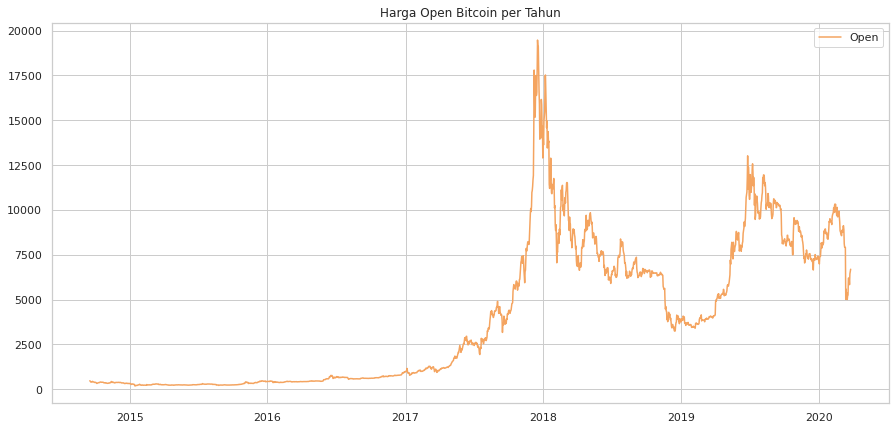

In [0]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.title('Harga Open Bitcoin per Tahun')
sns.lineplot(data=df['Open'], label='Open',color='sandybrown')

In [0]:
df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]

In [0]:
df_test.tail()

,Open,Open_lag1,Open_avg_window_length2,Open_lag2,Open_avg_window_length3,Open_lag3,Open_avg_window_length4,High_lag1,High_avg_window_length2,High_lag2,High_avg_window_length3,High_lag3,High_avg_window_length4,Low_lag1,Low_avg_window_length2,Low_lag2,Low_avg_window_length3,Low_lag3,Low_avg_window_length4,Close_lag1,Close_avg_window_length2,Close_lag2,Close_avg_window_length3,Close_lag3,Close_avg_window_length4,Adj Close_lag1,Adj Close_avg_window_length2,Adj Close_lag2,Adj Close_avg_window_length3,Adj Close_lag3,Adj Close_avg_window_length4,Volume_lag1,Volume_lag2,Volume_lag3
2008,5002.578125,5227.113770,5236.265137,5245.416504,5554.728028,6191.653809,5717.676392,5331.833984,5830.784912,6329.735840,6168.610514,6844.261719,6220.991699,5069.335938,5153.152344,5236.968750,5390.695475,5865.781738,5526.227417,5238.438477,5714.815674,6191.192871,5876.136556,6198.778320,5953.369018,5238.438477,5714.815674,6191.192871,5876.136556,6198.778320,5953.369018,3.787880e+10,5.100073e+10,5.444298e+10
2009,5227.113770,5245.416504,5718.535157,6191.653809,5881.197266,6206.521484,5957.287476,6329.735840,6586.998780,6844.261719,6517.377604,6378.135254,6477.957520,5236.968750,5551.375244,5865.781738,5678.524577,5932.823242,5714.821899,6191.192871,6194.985595,6198.778320,6191.679199,6185.066406,6101.323120,6191.192871,6194.985595,6198.778320,6191.679199,6185.066406,6101.323120,5.100073e+10,5.444298e+10,4.249439e+10
2010,5245.416504,6191.653809,6199.087647,6206.521484,6194.577799,6185.558105,6103.776978,6844.261719,6611.198487,6378.135254,6527.364746,6359.697266,6506.507202,5865.781738,5899.302490,5932.823242,5874.106282,5823.713867,5851.830811,6198.778320,6191.922363,6185.066406,6071.366536,5830.254883,6157.603637,6198.778320,6191.922363,6185.066406,6071.366536,5830.254883,6157.603637,5.444298e+10,4.249439e+10,4.009966e+10
2011,6191.653809,6206.521484,6196.039795,6185.558105,6074.484700,5831.374512,6165.024170,6378.135254,6368.916260,6359.697266,6393.922363,6443.934570,6492.697510,5932.823242,5878.268555,5823.713867,5847.180501,5785.004395,5988.151978,6185.066406,6007.660644,5830.254883,6143.878743,6416.314941,6291.609985,6185.066406,6007.660644,5830.254883,6143.878743,6416.314941,6291.609985,4.249439e+10,4.009966e+10,4.649192e+10
2012,6206.521484,6185.558105,6008.466309,5831.374512,6151.191732,6436.642578,6286.296021,6359.697266,6401.815918,6443.934570,6530.884928,6789.022949,6580.768799,5823.713867,5804.359131,5785.004395,6006.594889,6411.066406,6176.944214,5830.254883,6123.284912,6416.314941,6327.124512,6734.803711,6420.923218,5830.254883,6123.284912,6416.314941,6327.124512,6734.803711,6420.923218,4.009966e+10,4.649192e+10,4.822191e+10


In [0]:
df_train.shape

(1611, 34)

In [0]:
df_test.shape

(403, 34)

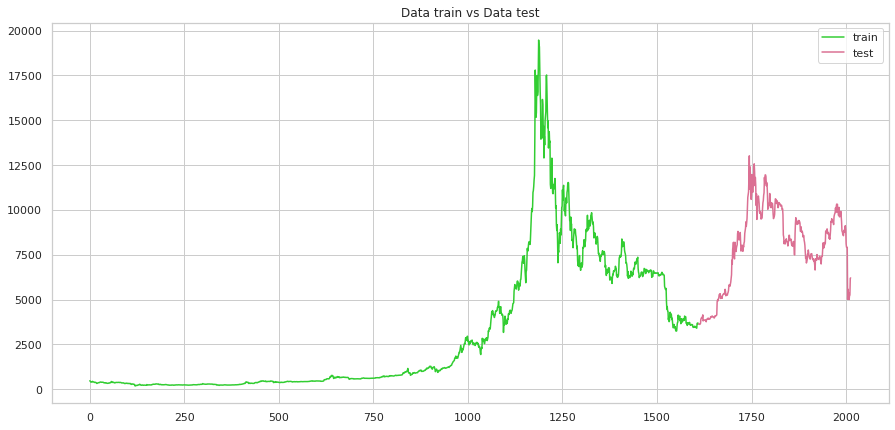

In [0]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.title('Data train vs Data test')
sns.lineplot(data=df_train['Open'], label='train',color='limegreen')
sns.lineplot(data=df_test['Open'], label='test',color='palevioletred')

In [0]:
from h2o.automl import H2OAutoML

In [0]:
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
hf_train.tail()

Open,Open_lag1,Open_avg_window_length2,Open_lag2,Open_avg_window_length3,Open_lag3,Open_avg_window_length4,High_lag1,High_avg_window_length2,High_lag2,High_avg_window_length3,High_lag3,High_avg_window_length4,Low_lag1,Low_avg_window_length2,Low_lag2,Low_avg_window_length3,Low_lag3,Low_avg_window_length4,Close_lag1,Close_avg_window_length2,Close_lag2,Close_avg_window_length3,Close_lag3,Close_avg_window_length4,Adj Close_lag1,Adj Close_avg_window_length2,Adj Close_lag2,Adj Close_avg_window_length3,Adj Close_lag3,Adj Close_avg_window_length4,Volume_lag1,Volume_lag2,Volume_lag3
3467.21,3454.95,3462.02,3469.09,3446.32,3414.93,3435.09,3478.15,3473.62,3469.09,3458.4,3427.95,3517.7,3451.94,3425.25,3398.57,3414.91,3394.22,3408.94,3466.36,3440.06,3413.77,3426.53,3399.47,3486.59,3466.36,3440.06,3413.77,3426.53,3399.47,3486.59,5.22755e+09,5.4822e+09,5.00496e+09
3454.95,3469.09,3442.01,3414.93,3428.47,3401.38,3489.25,3469.09,3448.52,3427.95,3530.88,3695.61,3568.15,3398.57,3396.39,3394.22,3394.6,3391.02,3457.59,3413.77,3406.62,3399.47,3493.34,3666.78,3537.81,3413.77,3406.62,3399.47,3493.34,3666.78,3537.81,5.4822e+09,5.00496e+09,7.73562e+09
3469.09,3414.93,3408.15,3401.38,3495.96,3671.59,3540.27,3427.95,3561.78,3695.61,3601.17,3679.94,3624.63,3394.22,3392.62,3391.02,3477.27,3646.56,3518.2,3399.47,3533.13,3666.78,3579.15,3671.2,3606.91,3399.47,3533.13,3666.78,3579.15,3671.2,3606.91,5.00496e+09,7.73562e+09,6.15883e+09
3414.93,3401.38,3536.48,3671.59,3582.05,3673.2,3610.44,3695.61,3687.78,3679.94,3690.2,3695.04,3691.55,3391.02,3518.79,3646.56,3559.52,3640.98,3580.21,3666.78,3668.99,3671.2,3676.06,3690.19,3669.15,3666.78,3668.99,3671.2,3676.06,3690.19,3669.15,7.73562e+09,6.15883e+09,6.28226e+09
3401.38,3671.59,3672.39,3673.2,3680.13,3695.61,3670.79,3679.94,3687.49,3695.04,3690.2,3695.61,3684.79,3646.56,3643.77,3640.98,3643.28,3642.29,3637.1,3671.2,3680.7,3690.19,3669.94,3648.43,3665.84,3671.2,3680.7,3690.19,3669.94,3648.43,3665.84,6.15883e+09,6.28226e+09,6.27706e+09
3671.59,3673.2,3684.41,3695.61,3670.52,3642.75,3666.29,3695.04,3695.32,3695.61,3686.41,3668.59,3682.25,3640.98,3641.63,3642.29,3633.94,3618.56,3629.77,3690.19,3669.31,3648.43,3664.05,3653.53,3656.05,3690.19,3669.31,3648.43,3664.05,3653.53,3656.05,6.28226e+09,6.27706e+09,6.48038e+09
3673.2,3695.61,3669.18,3642.75,3663.99,3653.6,3655.78,3695.61,3682.1,3668.59,3677.98,3669.75,3670.05,3642.29,3630.42,3618.56,3626.03,3617.25,3621.45,3648.43,3650.98,3653.53,3644.68,3632.07,3637.73,3648.43,3650.98,3653.53,3644.68,3632.07,3637.73,6.27706e+09,6.48038e+09,6.4389e+09
3695.61,3642.75,3648.18,3653.6,3642.51,3631.17,3636.22,3668.59,3669.17,3669.75,3661.53,3646.26,3658.1,3618.56,3617.9,3617.25,3614.5,3607.7,3612.93,3653.53,3642.8,3632.07,3634.16,3616.88,3630.82,3653.53,3642.8,3632.07,3634.16,3616.88,3630.82,6.48038e+09,6.4389e+09,6.27104e+09
3642.75,3653.6,3642.39,3631.17,3634.05,3617.37,3629.35,3669.75,3658,3646.26,3654.6,3647.8,3654.16,3617.25,3612.47,3607.7,3611.05,3608.21,3612.11,3632.07,3624.48,3616.88,3623.25,3620.81,3624.89,3632.07,3624.48,3616.88,3623.25,3620.81,3624.89,6.4389e+09,6.27104e+09,6.09195e+09
3653.6,3631.17,3624.27,3617.37,3621.27,3615.27,3624.29,3646.26,3647.03,3647.8,3648.96,3652.84,3656.86,3607.7,3607.95,3608.21,3610.39,3615.27,3612.59,3616.88,3618.85,3620.81,3622.49,3629.79,3635.33,3616.88,3618.85,3620.81,3622.49,3629.79,3635.33,6.27104e+09,6.09195e+09,5.93474e+09


In [0]:
hf_train.describe()

Rows:1611
Cols:34




,Open,Open_lag1,Open_avg_window_length2,Open_lag2,Open_avg_window_length3,Open_lag3,Open_avg_window_length4,High_lag1,High_avg_window_length2,High_lag2,High_avg_window_length3,High_lag3,High_avg_window_length4,Low_lag1,Low_avg_window_length2,Low_lag2,Low_avg_window_length3,Low_lag3,Low_avg_window_length4,Close_lag1,Close_avg_window_length2,Close_lag2,Close_avg_window_length3,Close_lag3,Close_avg_window_length4,Adj Close_lag1,Adj Close_avg_window_length2,Adj Close_lag2,Adj Close_avg_window_length3,Adj Close_lag3,Adj Close_avg_window_length4,Volume_lag1,Volume_lag2,Volume_lag3
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,int,int
mins,176.897003,176.897003,192.9835049999994,176.897003,197.93366999999975,176.897003,198.46275325,211.731003,215.21300500000007,211.731003,215.7180023333337,211.731003,215.59875099999948,171.509995,174.2034990000002,171.509995,182.72599799999983,171.509995,185.76324850000012,178.102997,193.97349550000007,178.102997,198.6813303333332,178.102997,198.8259964999997,178.102997,193.97349550000007,178.102997,198.6813303333332,178.102997,198.8259964999997,5914570.0,5914570.0,5914570.0
mean,2936.230921960276,2938.1957302482892,2939.1766453392283,2940.1575604301697,2940.163904076763,2942.1384215518333,2941.1601228885797,3024.718182348235,3025.7085408774064,3026.698899406583,3026.70594909352,3028.7007655257635,3027.7101220662644,2840.8482077889535,2841.839859725327,2842.831511661697,2842.838885076141,2844.836935777782,2843.8395304537553,2939.936862126008,2940.928907684356,2941.920953242706,2941.9289443080884,2943.9290175555548,2942.935624970982,2939.936862126008,2940.928907684356,2941.920953242706,2941.9289443080884,2943.9290175555548,2942.935624970982,2097354589.464308,2101114657.1427689,2104775007.4537551
maxs,19475.800781,19475.800781,19291.100586,19475.800781,19233.500650999995,19475.800781,18865.2006835,20089.0,19902.84960950001,20089.0,19725.566406333324,20089.0,19588.625000000004,18974.099609,18665.0,18974.099609,18281.766927,18974.099609,18030.175293000004,19497.400391,19319.100585999993,19497.400391,19250.80013033333,19497.400391,18882.2749025,19497.400391,19319.100585999993,19497.400391,19250.80013033333,19497.400391,18882.2749025,23840899072.0,23840899072.0,23840899072.0
sigma,3681.5687045802856,3681.0940930644706,3678.464016428678,3680.613011026992,3676.2006510346023,3680.116750258844,3674.0580014044317,3817.4782098328624,3815.375070329696,3816.9728192590583,3813.262284378722,3816.4546264566097,3811.1836069501514,3513.5635060147642,3510.844405162594,3513.0940038327244,3508.5626228257643,3512.611918477176,3506.3854229017165,3680.3611438316557,3677.7079612682796,3679.8657434744205,3675.4210805756693,3679.3575561423136,3673.262400775335,3680.3611438316557,3677.7079612682796,3679.8657434744205,3675.4210805756693,3679.3575561423136,3673.262400775335,3389584347.137138,3390654189.437326,3391608300.0846634
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,465.86401399999994,456.85998499999994,440.4814909999999,424.102997,425.2119953333333,394.673004,420.93024424999993,456.85998499999994,442.347488,427.834991,435.9969886666667,423.29599,430.10424025,413.104004,398.8180085,384.532013,395.839671,389.882996,395.17500325,424.44000199999994,409.61799599999995,394.79599,409.3799946666666,408.903992,406.7402495,424.44000199999994,409.61799599999995,394.79599,409.3799946666666,408.903992,406.7402495,34483200.0,37919700.0,36863600.0
1,456.85998499999994,424.102997,409.3880004999999,394.673004,408.95366399999995,408.084991,406.4902494999999,427.834991,425.56549050000007,423.29599,421.1856586666668,412.425995,417.61824025,384.532013,387.2075045,389.882996,389.1986696666667,393.181,391.1815035,394.79599,401.849991,408.903992,400.8403320000001,398.821014,401.16825100000005,394.79599,401.849991,408.903992,40

In [0]:
y = 'Open'
X = hf_train.columns
X.remove(y)

In [0]:
X

['Open_lag1',
 'Open_avg_window_length2',
 'Open_lag2',
 'Open_avg_window_length3',
 'Open_lag3',
 'Open_avg_window_length4',
 'High_lag1',
 'High_avg_window_length2',
 'High_lag2',
 'High_avg_window_length3',
 'High_lag3',
 'High_avg_window_length4',
 'Low_lag1',
 'Low_avg_window_length2',
 'Low_lag2',
 'Low_avg_window_length3',
 'Low_lag3',
 'Low_avg_window_length4',
 'Close_lag1',
 'Close_avg_window_length2',
 'Close_lag2',
 'Close_avg_window_length3',
 'Close_lag3',
 'Close_avg_window_length4',
 'Adj Close_lag1',
 'Adj Close_avg_window_length2',
 'Adj Close_lag2',
 'Adj Close_avg_window_length3',
 'Adj Close_lag3',
 'Adj Close_avg_window_length4',
 'Volume_lag1',
 'Volume_lag2',
 'Volume_lag3']

In [0]:
aml = H2OAutoML(max_runtime_secs = 600,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
lb = aml.leaderboard
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
DRF_1_AutoML_20200507_153111,190131,436.04,190131,293.057,0.0512703
StackedEnsemble_BestOfFamily_AutoML_20200507_153111,192464,438.707,192464,290.539,0.0517056
XGBoost_grid__1_AutoML_20200507_153111_model_8,229684,479.253,229684,351.497,0.0571894
GBM_grid__1_AutoML_20200507_153111_model_7,229701,479.272,229701,331.654,0.0572685
StackedEnsemble_AllModels_AutoML_20200507_153111,261821,511.684,261821,367.831,0.0605972
XRT_1_AutoML_20200507_153111,263862,513.675,263862,340.577,0.0580268
XGBoost_grid__1_AutoML_20200507_153111_model_13,281573,530.635,281573,383.222,0.0636069
GBM_1_AutoML_20200507_153111,332291,576.446,332291,428.11,0.0666432
XGBoost_grid__1_AutoML_20200507_153111_model_33,350945,592.406,350945,417.366,0.0655655
XGBoost_grid__1_AutoML_20200507_153111_model_27,354061,595.03,354061,420.857,0.0677108


In [0]:
lead=aml.leader

In [0]:
preds = lead.predict(hf_test)
preds1 = lead.predict(hf_train)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [0]:
#prediksi AutoML terhadap data test
df_results = pd.DataFrame()
df_results['real'] = df_test['Open'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(preds,use_pandas=True)
df_results.head()

,real,predictions
0,3653.604004,3648.648373
1,3631.170166,3642.171372
2,3617.368408,3596.704188
3,3615.270264,3632.023387
4,3633.359375,3798.589628


In [0]:
#prediksi AutoML terhadap data train
df_results1 = pd.DataFrame()
df_results1['real'] = df_train['Open'].reset_index(drop=True)
df_results1['predictions'] = h2o.as_list(preds1,use_pandas=True)
df_results1.tail()

,real,predictions
1606,3671.585938,3661.532887
1607,3673.201416,3669.277961
1608,3695.613037,3684.417330
1609,3642.751953,3644.337826
1610,3653.604004,3648.648373


In [0]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
from sklearn.metrics import mean_absolute_error

slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['real'])
R2 = r_value**2 
er = 1 - R2
mape1 = mape(df_results['real'],df_results['predictions'])
print('Akurasi R2 dan Error prediksi vs test')
print('R2 = ',r_value*r_value)
#print('Error : ',er)
#print('Mean Absolute Error: ' + str(mean_absolute_error(df_results['predictions'],df_results['real'])))
print('MAPE: ' "{:.2f}".format(mape1)+'%')

Akurasi R2 dan Error prediksi vs test
R2 =  0.9663972233214435
MAPE: 3.54%


In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results1['predictions'],y=df_results1['real'])
R2 = r_value**2 
er = 1 - R2
mape1 = mape(df_results1['real'],df_results1['predictions'])
print('Akurasi R2 dan Error prediksi vs train')
print('R2 : ',R2)
#print('error : ',er)
#print("Mean Absolute Error: " + str(mean_absolute_error(df_results1['predictions'],df_results1['real'])))
print('MAPE: ' "{:.2f}".format(mape1)+'%')

Akurasi R2 dan Error prediksi vs train
R2 :  0.9988227393291373
MAPE: 1.17%


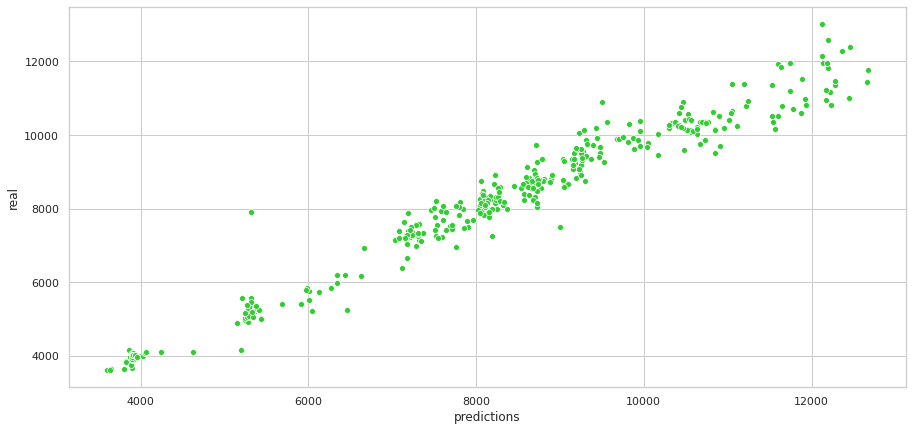

In [0]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
#plt.title('Harga Open Bitcoin per Tahun')
sns.scatterplot(data=df_results, x=df_results['predictions'],y=df_results['real'],color='limegreen')

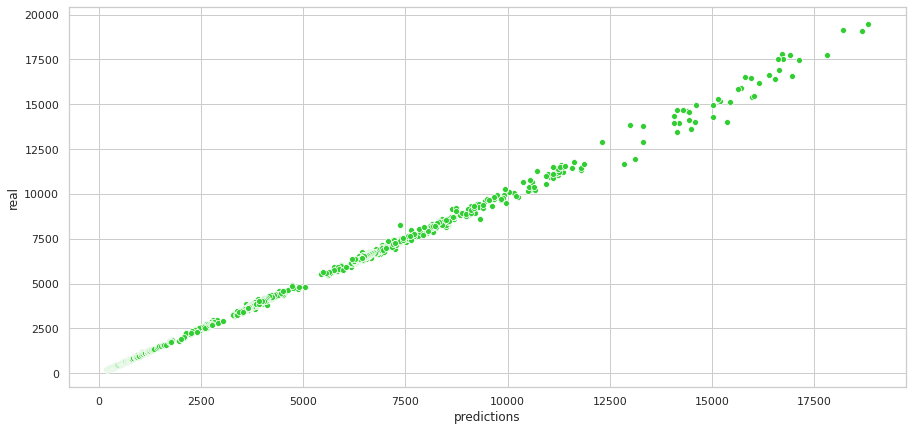

In [0]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
#plt.title('Harga Open Bitcoin per Tahun')
sns.scatterplot(data=df_results1, x=df_results1['predictions'],y=df_results1['real'],color='limegreen')

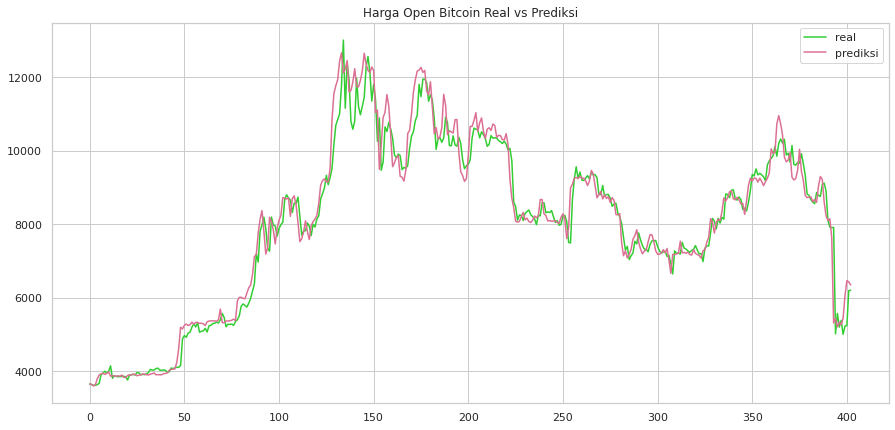

In [0]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.title('Harga Open Bitcoin Real vs Prediksi')
sns.lineplot(data=df_results['real'], label='real',color='limegreen')
sns.lineplot(data=df_results['predictions'], label='prediksi',color='palevioletred')

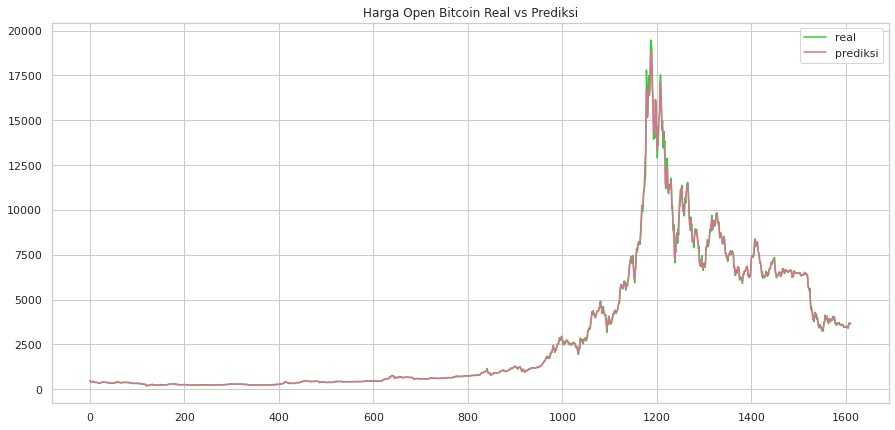

In [0]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.title('Harga Open Bitcoin Real vs Prediksi')
sns.lineplot(data=df_results1['real'], label='real',color='limegreen')
sns.lineplot(data=df_results1['predictions'], label='prediksi',color='palevioletred')